In [65]:
pip install skfeature-chappers

     ---------------------------------------- 66.3/66.3 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

C:\Users\kruta\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# loading dataset

In [2]:
data = pd.read_csv("RecoveryTimeDataset.csv")
data

,Id,LengthOfStay,ReadmissionCount,Gender,FacilityId,HeartAilments,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
0,13564856412,4.0,NaN,M,1853,0,True,None,29.4,143.0,74.0,1.0
1,13564856413,5.0,1.0,F,5288,0,False,None,25.3,128.0,78.0,3.0
2,13564856414,3.0,2.0,F,1338,0,False,None,32.7,152.0,64.0,2.0
3,13564856415,6.0,1.0,F,4964,0,True,None,31.1,165.0,105.0,1.0
4,13564856416,5.0,NaN,M,7593,0,False,None,32.4,111.0,53.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10996,13564867408,NaN,2.0,M,3019,0,False,Yes,27.6,107.0,83.0,2.0
10997,13564867409,NaN,NaN,F,9036,0,False,None,26.5,133.0,69.0,2.0
10998,13564867410,NaN,1.0,F,1486,0,False,Yes,28.5,177.0,108.0,2.0
10999,13564867411,NaN,3.0,F,2590,0,False,Yes,NaN,138.0,NaN,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11001 non-null  int64  
 1   LengthOfStay           10003 non-null  float64
 2   ReadmissionCount       5430 non-null   float64
 3   Gender                 11001 non-null  object 
 4   FacilityId             11001 non-null  int64  
 5   HeartAilments          11001 non-null  int64  
 6   PyschologicalAilments  11001 non-null  bool   
 7   SubstanceAbuseHistory  10609 non-null  object 
 8   BMI                    10999 non-null  float64
 9   ABG                    11001 non-null  float64
 10  Pulse                  10999 non-null  float64
 11  SecondaryDiagnosis     10762 non-null  float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 956.3+ KB


# Data Preprocessing

## first step is to covert datatype

In [4]:
data.SubstanceAbuseHistory.value_counts()

None    9092
Yes     1517
Name: SubstanceAbuseHistory, dtype: int64

### Coverting datatypes catorigal to numerical

In [5]:
#bool to int
data['PyschologicalAilments'].replace([False, True], [0, 1], inplace=True)
#object to int
data['SubstanceAbuseHistory'].replace(['None', 'Yes'], [0, 1], inplace=True)
data['Gender'].replace(['F', 'M'], [0, 1], inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11001 non-null  int64  
 1   LengthOfStay           10003 non-null  float64
 2   ReadmissionCount       5430 non-null   float64
 3   Gender                 11001 non-null  int64  
 4   FacilityId             11001 non-null  int64  
 5   HeartAilments          11001 non-null  int64  
 6   PyschologicalAilments  11001 non-null  int64  
 7   SubstanceAbuseHistory  10609 non-null  float64
 8   BMI                    10999 non-null  float64
 9   ABG                    11001 non-null  float64
 10  Pulse                  10999 non-null  float64
 11  SecondaryDiagnosis     10762 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.0 MB


### see if there is any null values or not

In [7]:
data.isnull().sum()

Id                          0
LengthOfStay              998
ReadmissionCount         5571
Gender                      0
FacilityId                  0
HeartAilments               0
PyschologicalAilments       0
SubstanceAbuseHistory     392
BMI                         2
ABG                         0
Pulse                       2
SecondaryDiagnosis        239
dtype: int64

here we have two option. either we can drop the all null values or we can replace it with using somemethod.but we can not drop the null values as there are 5571(half of the data) values null. so here we are replacing our null values with replacing mean. 

In [8]:
# #replacing null values with mean
mean_value = data.mean()
data.fillna(mean_value, inplace= True)
# data = data.dropna()

In [9]:
#checking if there is any null values or not
data.isnull().sum()

Id                       0
LengthOfStay             0
ReadmissionCount         0
Gender                   0
FacilityId               0
HeartAilments            0
PyschologicalAilments    0
SubstanceAbuseHistory    0
BMI                      0
ABG                      0
Pulse                    0
SecondaryDiagnosis       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11001 non-null  int64  
 1   LengthOfStay           11001 non-null  float64
 2   ReadmissionCount       11001 non-null  float64
 3   Gender                 11001 non-null  int64  
 4   FacilityId             11001 non-null  int64  
 5   HeartAilments          11001 non-null  int64  
 6   PyschologicalAilments  11001 non-null  int64  
 7   SubstanceAbuseHistory  11001 non-null  float64
 8   BMI                    11001 non-null  float64
 9   ABG                    11001 non-null  float64
 10  Pulse                  11001 non-null  float64
 11  SecondaryDiagnosis     11001 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 1.0 MB


## Feature selection

In [11]:
#here we have small dataset we are not doing feature selection. just dropping ID, FacilityId.

In [12]:
X = data.drop(['Id','FacilityId','LengthOfStay'], axis=1)
y = data['LengthOfStay']


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReadmissionCount       11001 non-null  float64
 1   Gender                 11001 non-null  int64  
 2   HeartAilments          11001 non-null  int64  
 3   PyschologicalAilments  11001 non-null  int64  
 4   SubstanceAbuseHistory  11001 non-null  float64
 5   BMI                    11001 non-null  float64
 6   ABG                    11001 non-null  float64
 7   Pulse                  11001 non-null  float64
 8   SecondaryDiagnosis     11001 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 773.6 KB


In [14]:
#Checking Coorelation using heatmap

<AxesSubplot:>

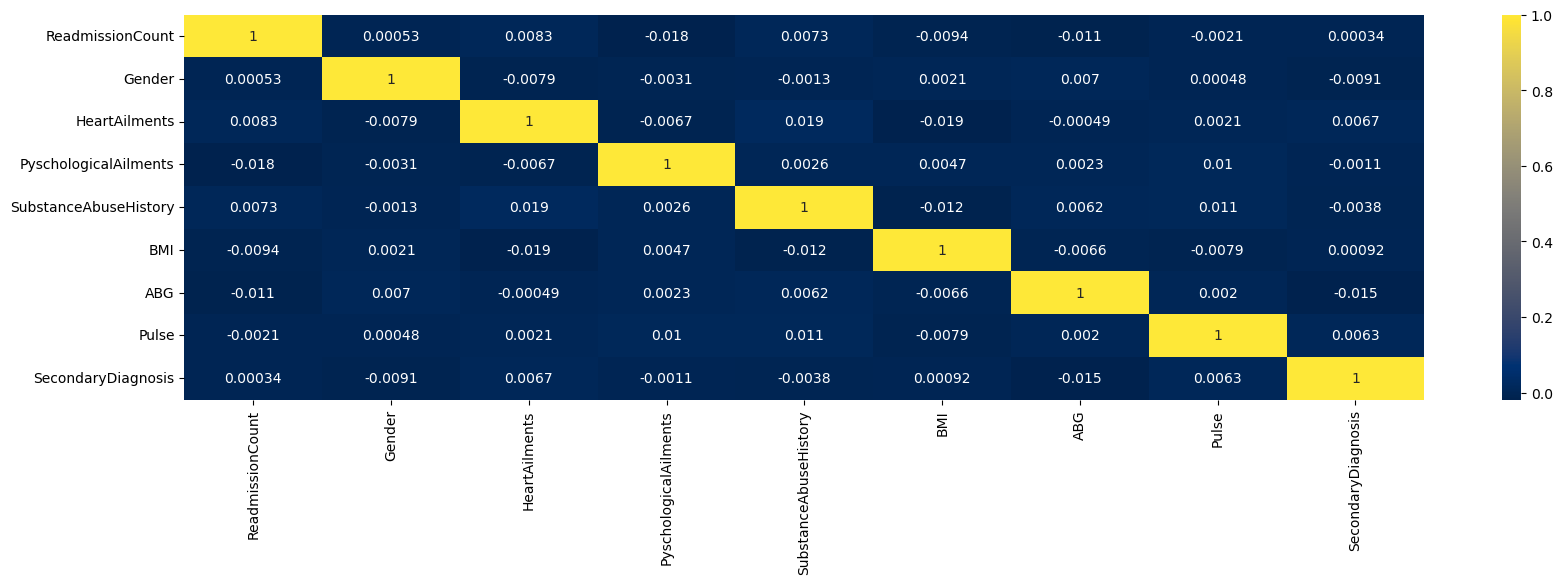

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(X.corr(), annot=True, cmap="cividis")

## To check how the data points are distributed

In [16]:
# # plt.figure(figsize=(15,8))
# # sns.scatterplot(x='Pulse', y='BMI', data=data, palette='copperr')

# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
# sns.scatterplot(x='Pulse', y='BMI', data=data, palette='pink')  # Use 'copper' as a valid color palette
# plt.title('Scatter Plot of Pulse vs. BMI')
# plt.xlabel('Pulse')
# plt.ylabel('BMI')
# plt.show()


In [17]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x='Pulse', y='BMI', data=data, hue='Gender', palette='copper_r')

<AxesSubplot:xlabel='Pulse', ylabel='BMI'>

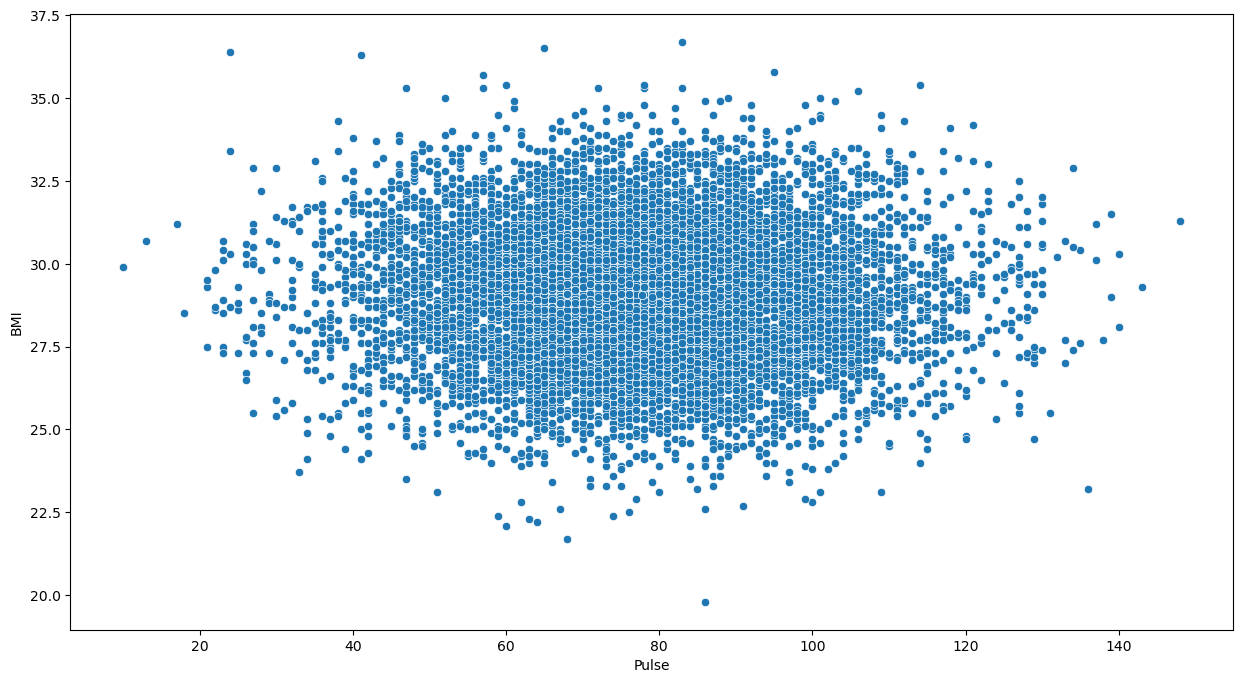

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Pulse', y='BMI', data=data, palette='copper_r')

## Spliting data into training and testing

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (you can adjust the test size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instantiate the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Calculate the R-squared (coefficient of determination) score
r2 = metrics.r2_score(y_test, y_pred)

# Print the RMSE and R-squared scores
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Print the model's score on the training data (R-squared)
train_r2 = model.score(X_train, y_train)
print("Training R-squared (R2) Score:", train_r2)


Root Mean Squared Error (RMSE): 3.0818086004064504
R-squared (R2) Score: 0.002513890923840356
Training R-squared (R2) Score: 0.0022471470684040096


In [21]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# Print the DataFrame
print(comparison_df)
# comparison_df.head()

         Actual  Predicted
107    3.000000   4.508533
10025  4.564931   4.637316
4162   4.000000   4.913933
7134   1.000000   4.642141
5284   1.000000   4.694375
...         ...        ...
2058   6.000000   4.430375
2249   1.000000   4.547437
6906   4.000000   5.053320
10550  4.564931   4.652691
6045   4.000000   4.525895

[2201 rows x 2 columns]


## Ridge 

In [29]:
from sklearn.linear_model import Ridge
# Create a Ridge Regression model
ridge_regressor = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha)

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.10f}')
print(f'R-squared (R2): {r2:.10f}')



Root Mean Squared Error (RMSE): 3.0818088152
R-squared (R2): 0.0025137519


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared scores
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2*100)


Root Mean Squared Error (RMSE): 3.2663019836544884
R-squared (R2) Score: -12.049055510569652


## Gradient Boosting Regressor model

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

# Fit the model to the training data
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE)' , rmse)
print(f'R-squared (R2)', r2)

Root Mean Squared Error (RMSE) 3.0854722485636823
R-squared (R2) 0.00014086208653318888


In [37]:
# Choose the degree of the polynomial (e.g., 2 for quadratic)
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a linear regression model to the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = poly_reg.predict(X_test_poly)

# Calculate R-squared (coefficient of determination) and RMSE (Root Mean Square Error)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE and R-squared scores
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

# Print the model's score on the training data (R-squared)
train_r = poly_reg.score(X_train_poly, y_train)
print("Training R-squared (R2) Score:", train_r)

Root Mean Squared Error (RMSE): 3.078854763179319
R-squared (R2) Score: 0.004425106027119763
Training R-squared (R2) Score: 0.00587803451914326


In [38]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
print(comparison_df)
# comparison_df.head()

         Actual  Predicted
107    3.000000   3.809502
10025  4.564931   4.607965
4162   4.000000   4.866787
7134   1.000000   4.634235
5284   1.000000   4.704870
...         ...        ...
2058   6.000000   4.568076
2249   1.000000   4.531207
6906   4.000000   5.285556
10550  4.564931   4.721809
6045   4.000000   4.560239

[2201 rows x 2 columns]
